<a href="https://colab.research.google.com/github/mamta85/Git-hub-tutorial/blob/master/facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns available: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')


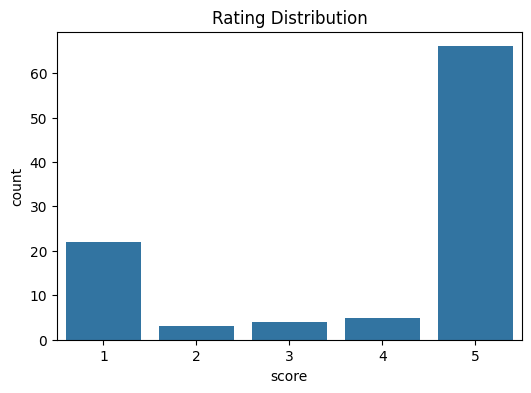

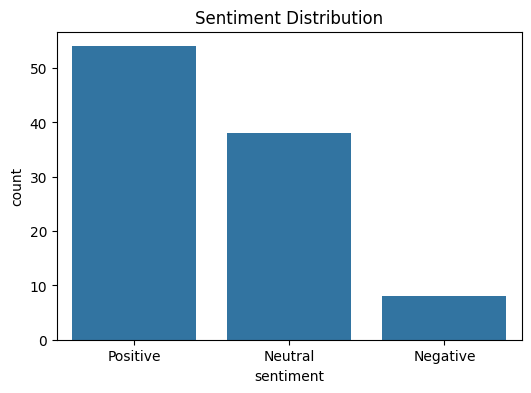

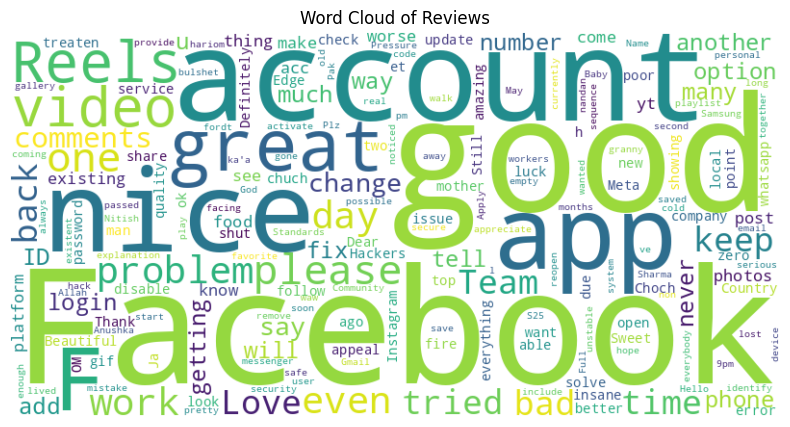

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
!pip install google-play-scraper pandas textblob deep-translator seaborn matplotlib wordcloud --quiet
from google_play_scraper import reviews
import pandas as pd

# Fetch reviews (example: Facebook app)
result, _ = reviews(
    'com.facebook.katana',  # App ID
    lang='en',
    country='us',
    count=100
)

df = pd.DataFrame(result)

print("Columns available:", df.columns)
df[['content', 'score']].head()
from deep_translator import GoogleTranslator

def translate_text(text):
    try:
        if not isinstance(text, str):
            return ''
        return GoogleTranslator(source='auto', target='en').translate(text)
    except Exception as e:
        print("Translation error:", e)
        return ''

# Translate review content
df['content'] = df['content'].fillna('')
df['text_en'] = df['content'].apply(translate_text)
from textblob import TextBlob

def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == '':
        return "Neutral"
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['text_en'].apply(get_sentiment)

# Show result
df[['text_en', 'sentiment']].head()
import seaborn as sns
import matplotlib.pyplot as plt

# Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='score')
plt.title('Rating Distribution')
plt.show()

# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()
from wordcloud import WordCloud

text = ' '.join(df['text_en'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()
df.to_csv('google_play_reviews.csv', index=False)

from google.colab import files
files.download('google_play_reviews.csv')